# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [200]:
#"""Three observations made in this Analysis include the following:
#       # 1. The observed timepoints across each treatment were not equal
#       # 2. Treatments Capomulin and Ramicane had the lowest mean tumor volume of all the treatments 
#       # 3. Treatments Capomulin and Ramicane had the most mice evaluated AND the most timepoints evalauted across all treatments"""


    


In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [164]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [165]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [166]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [167]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].unique()
print("there are n={} total mice".format(len(number_of_mice)))

there are n=249 total mice


In [168]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mice_timepoint = combined_data[combined_data[['Mouse ID','Timepoint']].duplicated() == True]
duplicates_mice_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [169]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mice = combined_data[combined_data['Mouse ID'].duplicated() == True]
duplicates_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [170]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data['Mouse ID'].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [171]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [172]:
clean_df = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [173]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'])

1888

## Summary Statistics

In [174]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [175]:
# Split up our data into groups based upon 'Drug Regimen'
Drug_Regimen = clean_df.groupby('Drug Regimen')


#Save info as series
#Mean Tumor Volume
average_info = Drug_Regimen['Tumor Volume (mm3)'].mean()
#average_info.head()
#type(average_info)

#Median Tumor Volume
median_info = Drug_Regimen['Tumor Volume (mm3)'].median()
#median_info.head()

#Tumor Volume Variance
variance_info = Drug_Regimen['Tumor Volume (mm3)'].var()

#Tumor Volume Std. Dev.
std_info = Drug_Regimen['Tumor Volume (mm3)'].std()

#Tumor Volume Std. Err
sem_info = Drug_Regimen['Tumor Volume (mm3)'].sem()


Drug_regimen_summary_df = pd.DataFrame({"Median Tumor Volume": average_info,"Median Tumor Volume": median_info,"Tumor Volume Variance": variance_info,"Tumor Volume Std. Dev.": std_info,"Tumor Volume Std. Err": sem_info})
Drug_regimen_summary_df.head()

,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,
Capomulin,41.557809,24.947764,4.994774,0.329346
Ceftamin,51.776157,39.290177,6.268188,0.469821
Infubinol,51.820584,43.128684,6.567243,0.492236
Ketapril,53.698743,68.553577,8.279709,0.603860
Naftisol,52.509285,66.173479,8.134708,0.596466


In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


In [177]:
summary_agg = pd.DataFrame(clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem]))
print(summary_agg)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [178]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



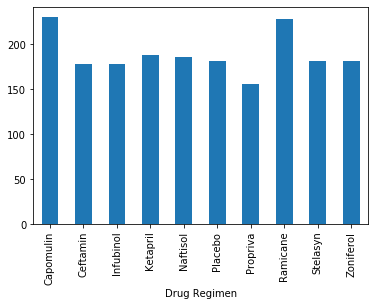

In [179]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_bar = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_regimen_bar.plot.bar(label="Total Mice per Drug Regimen")

plt.show()

In [180]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



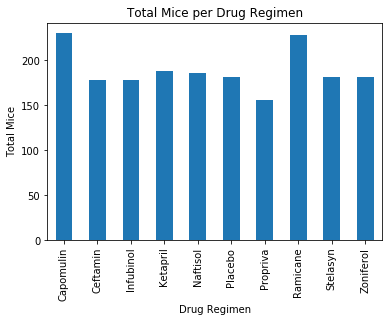

<Figure size 432x288 with 0 Axes>

In [181]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen_bar = clean_df.groupby('Drug Regimen')['Mouse ID'].count()

# Chart our data, give it a title, and label the axes
patron_chart = drug_regimen_bar.plot(kind="bar", title="Total Mice per Drug Regimen")
patron_chart.set_xlabel("Drug Regimen")
patron_chart.set_ylabel("Total Mice")

plt.show()
plt.tight_layout()

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



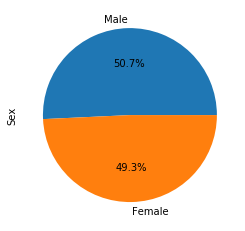

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_count= clean_df['Sex'].str.count('Male').sum()
female_count = clean_df['Sex'].str.count('Female').sum()

#print(male_count)
sex_df = pd.DataFrame({'Sex': [male_count, female_count]},index=['Male','Female'])
plot = sexdf_rounded.plot.pie(y='Sex', figsize=(4, 4),legend = False, autopct='%1.1f%%')




In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



Text(0.0, 1.0, 'Sex')

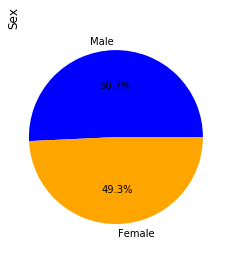

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart

sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["blue", "orange"]


plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%", shadow=False)
plt.title("Sex",loc='left', rotation='vertical', va='center')





## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [187]:
#clean_df.sort_values('date').groupby('id').tail(1)
clean_df_timepoint_max = clean_df.loc[clean_df.groupby('Drug Regimen').Timepoint.idxmax()]
#clean_df_timepoint_max
drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
clean_df_timepoint_max_interest_drugs = clean_df_timepoint_max[clean_df_timepoint_max['Drug Regimen'].isin(drugs_of_interest)]
clean_df_timepoint_max_interest_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
463,a203,Infubinol,Female,20,23,45,67.973419,2
9,k403,Ramicane,Male,21,16,45,22.050126,1


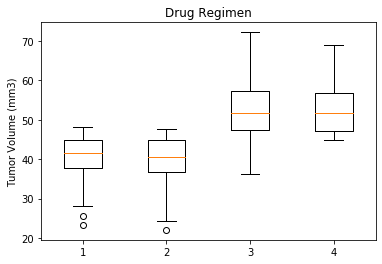

In [188]:
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for x in treatments_list:
    tumor_vol_data.append(clean_df.loc[clean_df['Drug Regimen'] == x, 'Tumor Volume (mm3)'])
#print(tumor_vol_data)


fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
plt.show()

In [198]:

treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []
new_df = pd.DataFrame()
for x in treatments_list:
    tumor_vol_data.append(clean_df.loc[clean_df['Drug Regimen'] == x, 'Tumor Volume (mm3)'])
    '''I know I need to turn into pandas dataframe but stuck on getting it there'''
    #Turn nto pandas data frame to calc IQR
    
    #new_df[x] = tumor_vol_data
    #Q1 = new_df[x].quantile(0.25)
    #Q3 = new_df[x].quantile(0.75)
    #QR = Q3 - Q1


In [190]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [191]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

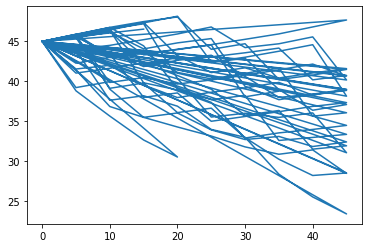

In [192]:
Capomulin_summary = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
x_axis_data  = Capomulin_summary['Timepoint']
y_axis_data  = Capomulin_summary['Tumor Volume (mm3)']
plt.plot(x_axis_data, y_axis_data)
plt.show()

In [193]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [194]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

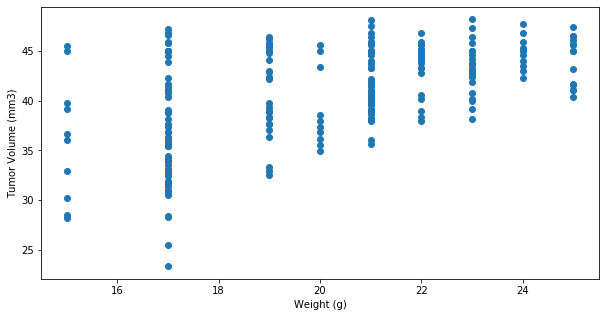

In [197]:


Capomulin_summary = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

x_value = Capomulin_summary['Weight (g)']
y_value = Capomulin_summary['Tumor Volume (mm3)']
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


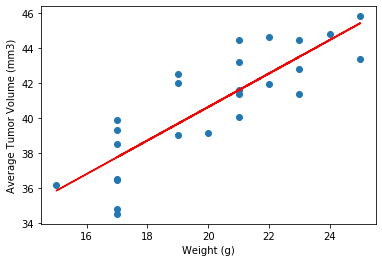

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

